In [46]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [47]:
url = 'https://www.cupoy.com/newsfeed/topicgrp/business_tw'

In [59]:
browser = webdriver.Chrome()
browser.get(url)  # 打開瀏覽器並連到東森新聞雲網頁

SCROLL_PAUSE_TIME = 5

for i in range(30):
    time.sleep(SCROLL_PAUSE_TIME)
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [40]:
#
# 這裡先建立一個函數，其功能是連到外部連結，並爬取新聞內容。
#
def getNewsDetailContent(link_url):
    resp = requests.get(link_url)
    resp.encoding = 'utf-8'
    #print(resp.text)

    soup = BeautifulSoup(resp.text, 'lxml')
    #print(soup)
    #news_content = soup.find("article", attrs={'itemprop':'articleBody'}).find_all('p')
    news_content = soup.find("article", attrs={'itemprop':"articleBody"}).find_all('p')
    print(news_content)
    for p in news_content:
        """
        .string屬性說明：
        (1) 若當前tag節點底下沒有其他tag子節點，會直接抓取內容(返回"NavigableString")
        (2) 若當前tag節點底下只有唯一的一個tag子節點，也會直接抓取tag子節點的內容(返回"NavigableString")
        (3) 但若當前tag節點底下還有很多個tag子節點，.string就無法判斷，(返回"None")
        """
        if ((p.string) is not None):
            print(p.string)

In [41]:
def getNewsDetailContent2(link_url):
    resp = requests.get(link_url)
    resp.encoding = 'utf-8'

    soup = BeautifulSoup(resp.text, 'lxml')
    print(soup)
    news_content = soup.find_all('p')
    for p in news_content:
        if ((p.text) is not None):
            print(p.text)

In [89]:
# 爬取網頁內容，解析後萃取新聞摘要
url = 'https://www.cupoy.com/newsfeed/topicgrp/business_tw'
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get(url)
time.sleep(5)
count = 0
target = []
category_list = []
while (count <= 500) :
    html = browser.page_source
    soup = BeautifulSoup(html, "lxml")
    #all_news = soup.find("div", attrs={'class':'ReactVirtualized__Grid__innerScrollContainer'})
#print(all_news)
    news_block = soup.find_all('div', attrs={'class':'sc-eEieub sc-iuDHTM ibJqYc'})
    for content in news_block:
        category = content.find(class_ = 'sc-gacfCG bPSpUf').text
        title = content.find(class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        if title not in target:
            count = count + 1
            print(count, category, title)
            target.append(title)
            category_list.append(category)
        if count == 501:
            break
    time.sleep(0.7)
    browser.execute_script("window.scrollTo(0, 1000000);")

1 共享經濟 過年不想下廚，那就叫食物外送！看 Uber 如何運用5分鐘到達的優勢，顛覆運輸業
2 Fintech金融科技 1.65 億買下洛杉磯最貴豪宅！貝佐斯花了萬分之十三身家 - INSIDE
3 趨勢與策略 阿瘦靠數據實現個人化服務，更讓BI成公司人人必備能力 | iThome
4 職涯 抗武漢肺炎，在家工作也不怕！6款超強大遠距辦公工具懶人包，快給老闆看｜數位時代
5 兩岸 「鑽石公主號」乘客可以下船了！羣聚感染太嚴重，日本政府終於同意「老病者明天上岸」-風傳媒
6 兩岸 湖北一把手被拔官！武漢肺炎撼動中共人事：省委書記蔣超良去職，上海市委書記應勇調任救火-風傳媒
7 兩岸 疫情大爆發？中國更改確診標準，武漢肺炎患者一口氣新增1萬5千人、252死-風傳媒
8 職涯 華航宣佈主管減薪10％！因武漢肺炎疫情影響，鼓勵員工主動休假、共體時艱｜數位時代
9 理財 代言品牌慘被抵制、投資卻爆千萬假帳 曾一同「背骨臺灣」範瑋琪姊妹們，如今各自深陷火窟-風傳媒
10 職涯 不要讓抱怨變成習慣，愛抱怨的人不會進步 | 知 識 家
11 兩岸 【改革 KMT 就像對抗武漢肺炎】提出治病方法才是關鍵！致郝龍斌與江啟臣：兩岸論述光提「萬年老梗」是沒用的 | BuzzOrange
12 兩岸 新新聞》起底喬武漢包機的臺協會長蕭永瑞，國民黨大老之女、南懷瑾門生-風傳媒
13 房地產 預售新案銷量不到5成、疫情衝擊、賣方仍開高價…這些原因讓房市復甦全面落空！-風傳媒
14 職涯 不要生氣，除非生氣能讓你達到目的！ | 知 識 家
15 網紅經濟與自媒體 品牌行銷人必讀！比起按讚數，你最該關注的是這些IG指標 | SmartM 新網路科技
16 財經 帶小孩不再心好累，幼兒托育補助2020新制上路，不同縣市申請眉角要注意！-風傳媒
17 創業 「分散風險」是錯的？這位伊朗裔創業家找到方法「一心十用」，建立年營收破億的美容王國！
18 蘋果專區 你太能幹，其實是場災難！這位學會「少做一點」的創業家，靠著摔不壞的 iPhone 手機殼建立了營業額破億的王國
19 國際 菲律賓拒絕解除對臺旅行禁令，總統杜特蒂：首要關切菲國人民安全 - The News Lens 關鍵評論網
20 趨勢與策略 「Android 之父」光環已散盡， Andy Rubin 自創品牌「Essential 」手機宣佈

In [90]:
browser.quit()

In [91]:
len(target)

501

In [92]:
import pandas as pd
df = pd.DataFrame(target, columns=['標題'])
df

,標題
0,過年不想下廚，那就叫食物外送！看 Uber 如何運用5分鐘到達的優勢，顛覆運輸業
1,1.65 億買下洛杉磯最貴豪宅！貝佐斯花了萬分之十三身家 - INSIDE
2,阿瘦靠數據實現個人化服務，更讓BI成公司人人必備能力 | iThome
3,抗武漢肺炎，在家工作也不怕！6款超強大遠距辦公工具懶人包，快給老闆看｜數位時代
4,「鑽石公主號」乘客可以下船了！羣聚感染太嚴重，日本政府終於同意「老病者明天上岸」-風傳媒
...,...
496,勞動事件法上路，企業老闆要知道的事 - 續集 - Mobile01
497,年過 30 我學到的事：比起工作，人生才是你的「正職」 | 經理人
498,對抗武漢肺炎的亂世投資術 | 財訊- 掌握趨勢 投資未來 | 最懂投資的財經媒體
499,美國取消對部分開發中國家的WTO補貼優惠待遇 中國、印度也在其中 | Anue鉅亨 - 國際政經


In [93]:
df.insert(1, '類別', category_list)

In [95]:
df.head()

,標題,類別
0,過年不想下廚，那就叫食物外送！看 Uber 如何運用5分鐘到達的優勢，顛覆運輸業,共享經濟
1,1.65 億買下洛杉磯最貴豪宅！貝佐斯花了萬分之十三身家 - INSIDE,Fintech金融科技
2,阿瘦靠數據實現個人化服務，更讓BI成公司人人必備能力 | iThome,趨勢與策略
3,抗武漢肺炎，在家工作也不怕！6款超強大遠距辦公工具懶人包，快給老闆看｜數位時代,職涯
4,「鑽石公主號」乘客可以下船了！羣聚感染太嚴重，日本政府終於同意「老病者明天上岸」-風傳媒,兩岸


In [146]:
count = df.groupby('類別')

In [147]:
sizes = count.size()

In [148]:
sizes = pd.DataFrame(size, columns=['count'])

In [149]:
sizes = size.reset_index()

In [171]:
len(sizes['類別'])

28

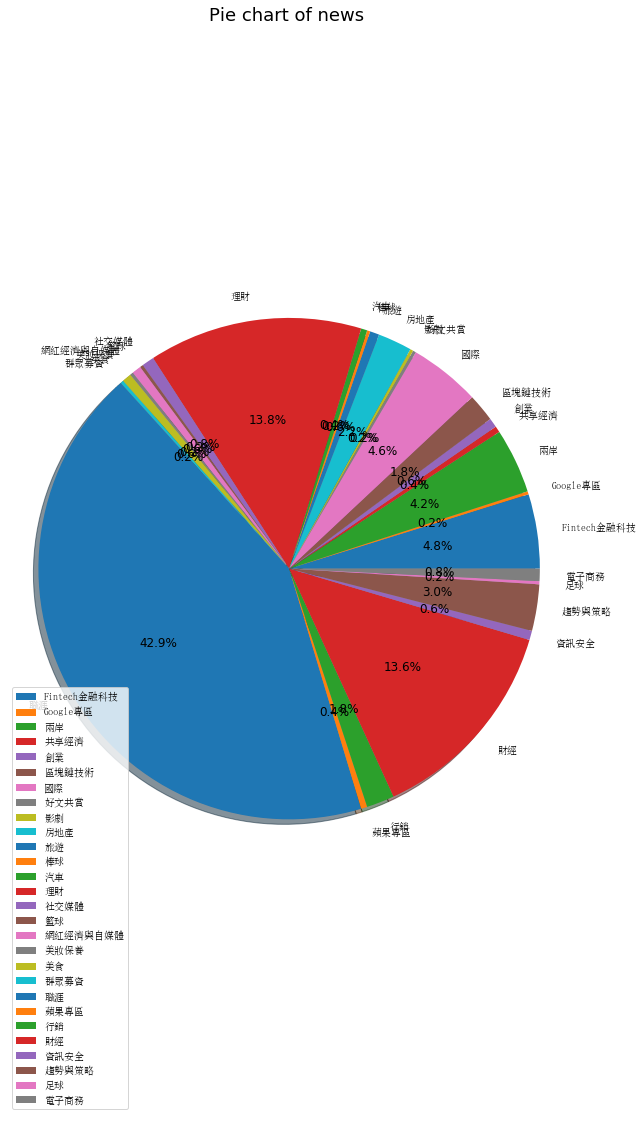

In [175]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
#https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/359974/
myfont = FontProperties("SimSun")
plt.figure(figsize=(10,20))    # 顯示圖框架大小                 
labels = sizes["類別"] 
size = sizes["count"]                         # 製作圓餅圖的數值來源
# value：得到餅圖的返回值
# o_text：餅圖外標籤的文字
# i_texts：餅圖內部文字的value
value,o_text,i_text = plt.pie(size,                           # 數值                
                        labels = labels,
                        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位          
                        pctdistance = 0.6,              # 數字距圓心的距離
                        textprops = {"fontsize" : 12},  # 文字大小
                        shadow=True)                    # 設定陰影

for i in o_text: 
    i.set_fontproperties(myfont) 
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Pie chart of news", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best",prop=myfont)                                  # 設定圖例及其位置為最佳


In [188]:
df.to_csv('D:\\web crawler\\web crawler news.csv', encoding='utf_8_sig')